In [2]:
import pandas as pd
bike = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(bike.shape)
bike.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
datetime = pd.to_datetime(bike['datetime'])
bike['year'] = datetime.dt.year
bike['month'] = datetime.dt.month
bike['day'] = datetime.dt.day
bike['hour'] = datetime.dt.hour
bike['minute'] = datetime.dt.minute
bike['second'] = datetime.dt.second
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


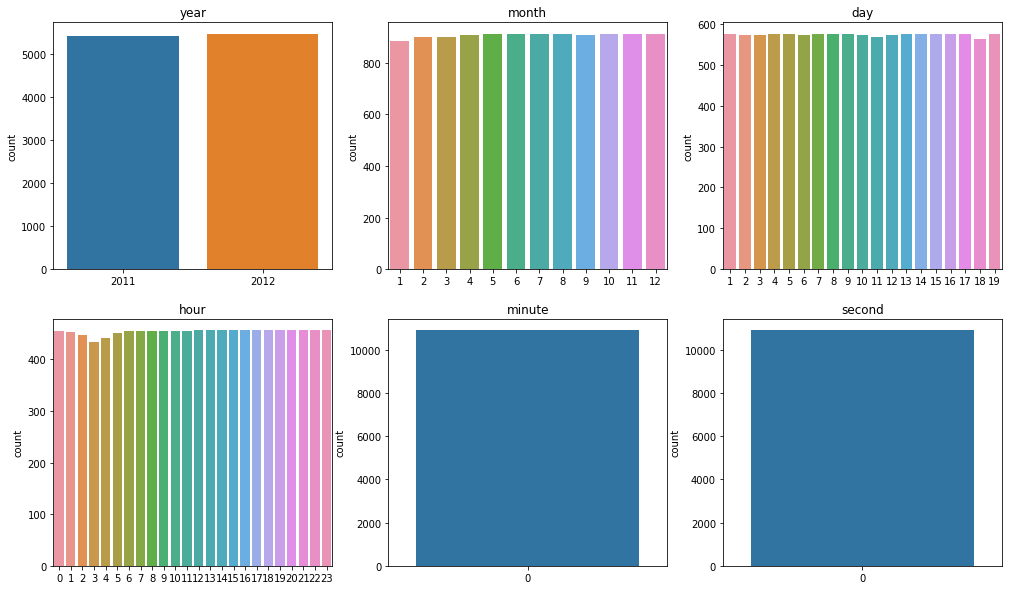

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(17,10))

plt.subplot(2,3,1)
sns.countplot(data=bike, x='year').set_xlabel('')
plt.title('year')

plt.subplot(2,3,2)
sns.countplot(data=bike, x='month').set_xlabel('')
plt.title('month')

plt.subplot(2, 3, 3)
sns.countplot(data=bike, x='day').set_xlabel('')
plt.title('day')

plt.subplot(2, 3, 4)
sns.countplot(data=bike, x='hour').set_xlabel('')
plt.title('hour')

plt.subplot(2, 3, 5)
sns.countplot(data=bike, x='minute').set_xlabel('')
plt.title('minute')

plt.subplot(2, 3, 6)
sns.countplot(data=bike, x='second').set_xlabel('')
plt.title('second')
plt.show()

In [63]:
X = bike[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 
        'humidity', 'windspeed', 'year', 'month', 'day', 'hour']].values
y = bike['count'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708,)
(2178, 12) (2178,)


In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
predictions = model.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [66]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = mse**0.5
print(mse, rmse)

19945.37005375412 141.22807813517156


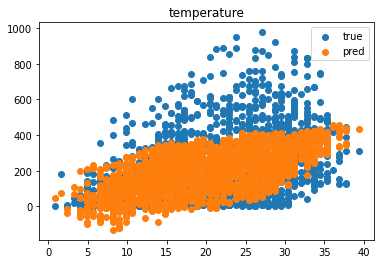

In [69]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.title('temperature')
plt.show()

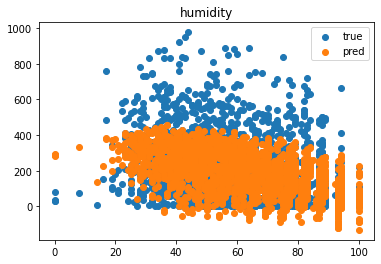

In [70]:
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.legend()
plt.title('humidity')
plt.show()